In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import SGDRegressor



In [2]:
boxe = sns.load_dataset('boxe')

In [3]:
sns.get_data_home()

'C:\\Users\\Leader\\seaborn-data'

In [4]:
boxe.shape

(999, 6)

In [5]:
boxe.head()

,win,age,weight,Size,NbVictory,NbLose
0,1,24,85,188,20,0
1,0,40,110,165,11,9
2,1,30,100,190,35,4
3,0,28,60,160,8,6
4,1,19,100,187,7,7


In [6]:
boxe

,win,age,weight,Size,NbVictory,NbLose
0,1,24,85,188,20,0
1,0,40,110,165,11,9
2,1,30,100,190,35,4
3,0,28,60,160,8,6
4,1,19,100,187,7,7
...,...,...,...,...,...,...
994,1,41,74,219,5,1
995,1,52,67,175,5,11
996,0,40,92,168,19,20
997,1,18,113,193,45,28


In [7]:
boxe.isnull().sum()

win          0
age          0
weight       0
Size         0
NbVictory    0
NbLose       0
dtype: int64

In [8]:
boxe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   win        999 non-null    int64
 1   age        999 non-null    int64
 2   weight     999 non-null    int64
 3   Size       999 non-null    int64
 4   NbVictory  999 non-null    int64
 5   NbLose     999 non-null    int64
dtypes: int64(6)
memory usage: 47.0 KB


In [9]:
boxe.describe()

,win,age,weight,Size,NbVictory,NbLose
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,0.526527,38.847848,95.358358,185.219219,24.244244,25.328328
std,0.499546,12.507107,20.356977,20.548076,14.639023,14.734331
min,0.000000,18.000000,60.000000,150.000000,0.000000,0.000000
25%,0.000000,28.000000,78.000000,167.000000,11.000000,13.000000
50%,1.000000,39.000000,96.000000,184.000000,24.000000,26.000000
75%,1.000000,50.000000,113.000000,203.500000,37.000000,38.000000
max,1.000000,60.000000,130.000000,220.000000,50.000000,50.000000


<AxesSubplot:title={'center':'Histogram of weight'}, xlabel='weight', ylabel='Frequency'>

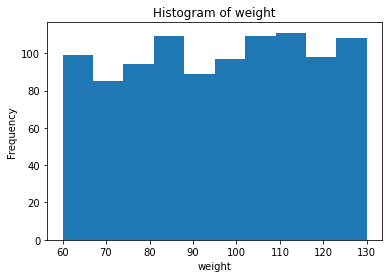

In [10]:
plt.title("Histogram of weight")
plt.xlabel("weight")
boxe['weight'].plot.hist()

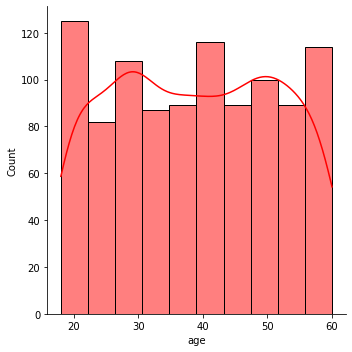

In [11]:
sns.displot(boxe["age"], bins=10, kde=True, color='red')

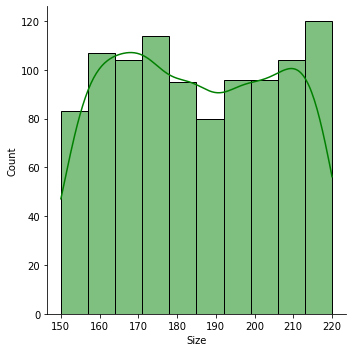

In [12]:
sns.displot(boxe["Size"], bins=10, kde=True, color='green')

<AxesSubplot:>

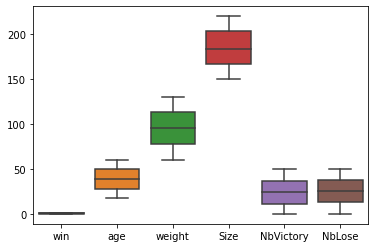

In [13]:
sns.boxplot(data=boxe)

In [14]:
#Importing Libraries.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [15]:
boxe

,win,age,weight,Size,NbVictory,NbLose
0,1,24,85,188,20,0
1,0,40,110,165,11,9
2,1,30,100,190,35,4
3,0,28,60,160,8,6
4,1,19,100,187,7,7
...,...,...,...,...,...,...
994,1,41,74,219,5,1
995,1,52,67,175,5,11
996,0,40,92,168,19,20
997,1,18,113,193,45,28


In [16]:
y = boxe['win']
X = boxe[['age','weight','Size','NbVictory','NbLose']]

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=20)


In [18]:
X_test

,age,weight,Size,NbVictory,NbLose
871,60,92,216,45,19
694,36,91,202,41,30
797,31,86,166,5,47
147,29,107,205,39,13
857,26,65,214,15,3
...,...,...,...,...,...
182,22,108,151,16,35
440,19,95,214,49,48
356,22,116,214,10,21
317,46,62,164,44,8


In [19]:
y_test

871    0
694    1
797    0
147    1
857    1
      ..
182    0
440    0
356    1
317    1
561    1
Name: win, Length: 100, dtype: int64

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X, y, train_size = 0.9, random_state = 20)

In [21]:
X_train

,age,weight,Size,NbVictory,NbLose
18,40,77,164,20,18
189,32,85,185,5,50
444,22,62,194,12,38
624,46,62,166,46,46
586,50,107,170,40,16
...,...,...,...,...,...
924,25,67,220,26,45
223,60,66,165,45,20
271,18,91,220,48,22
474,29,103,172,39,17


In [22]:
y_train

18     0
189    0
444    1
624    1
586    0
      ..
924    0
223    1
271    1
474    0
355    0
Name: win, Length: 899, dtype: int64

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


In [24]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)


In [25]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[16, 30],
       [ 9, 45]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

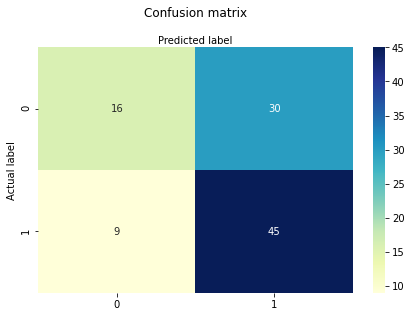

In [26]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [27]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))


Accuracy: 0.61
Precision: 0.6
Recall: 0.8333333333333334


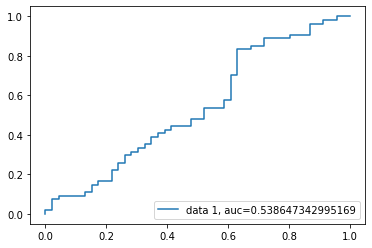

In [28]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

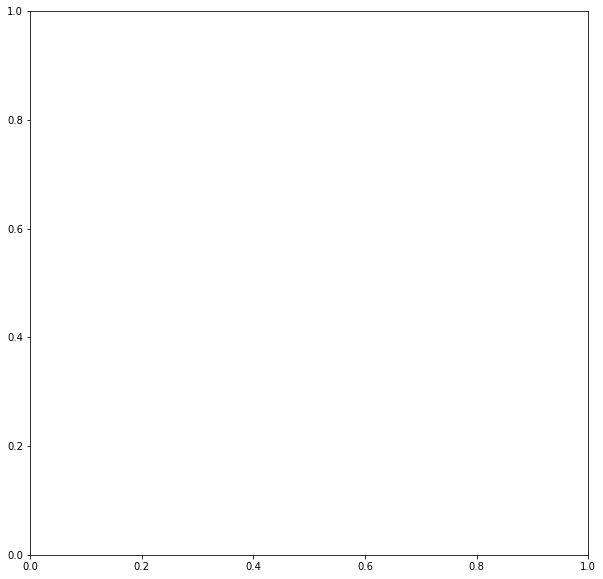

In [29]:
#check the correlation between my variables
ax , fig = plt.subplots(figsize=(10,10))
corrMatrix = boxe.corr(y)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corrMatrix, dtype=bool))
sns.heatmap(corrMatrix , mask=mask, annot=True )
plt.show()

In [ ]:
model = KNeighborsClassifier()

In [ ]:
y = [1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,1]


In [ ]:
y = boxe['win']

In [ ]:
y.shape


In [ ]:
y.head()

In [ ]:
x = boxe.drop('win', axis=1)

In [ ]:
print(x[0:1])


In [ ]:
model.fit(x, y)

In [ ]:
model.score(x, y)

In [ ]:
model.predict(x)

In [ ]:
def win(model, age = 40, weight = 60, size = 160, NbVictory = 16, NbLose = 7):
    x = np.array([age, weight, size, NbVictory, NbLose]).reshape(1,5)
    print(model.predict(x))
    print(model.predict_proba(x))
    

In [ ]:
win(model)

In [ ]:
win(model)

In [ ]:
win(model)

In [ ]:
win(model)

In [ ]:
win(model)

In [ ]:
or 